In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math


def initialize():
    n = [100, 150, 200, 300, 400]
    X_min = -1.0
    X_max = 1.0
    dx = []
    for i in range(len(n)):
        dx.append((X_max-X_min)/n[i])
#    h = np.array([0.7, 0.9, 1.1, 1.3, 1.5, 1.8, 2.0, 2.2])*dx[0]
    f = raw_input("Enter G for gaussian kernel and C for cubicspline kernel")
    return dx, n, f, X_min, X_max


def kernel_decis(g, f, x, y, h, n):
        if(f == 'C'):
            if(g == 4):
                W = cubicspline(x, y, h, n)
            else:
                W = diff_cubics(x, y, h, n)
        elif(f == 'G'):
            if(g == 4):
                W = gaussian(x, y, h, n)
            else:
                W = diff_gaussian(x, y, h, n)
        else:
            print 'entered wrong option'
        return W


def cubicspline(x, y, h, n):
    W_val = []
    for i in range(n):
        q = abs(y-x[i])/h
        if(q < 1.0):
            W = (1.0/h)*(2.0/3-q**2+(q**3)/2.0)
        elif(1.0 <= q < 2.0):
            W = (1.0/(6*h))*(2-q)**3
        else:
            W = 0
        W_val.append(W)
#    if(y == x[10]):
#        plt.plot(x, W_val)
#        plt.show()
    return W_val


def gaussian(x, y, h, n):
    W_val = []
    for i in range(n):
        q = abs(y-x[i])/h
        W = 1/(np.sqrt(np.pi)*h)*(math.exp(-q**2))
        W_val.append(W)
#    if(y == x[150]):
#        plt.plot(x, W_val)
#        plt.show()
    return W_val


def diff_cubics(x, y, h, n):
    W_val = []
    Q = []
    for i in range(n):
        q = abs(y-x[i])/h
        Q.append(q)
        if(0 <= q < 1):
            W = (-2*q/h**2)+(3*q**2)/(2*h**2)
        elif(1 <= q < 2):
            W = -(2-q)**2/(2*h**2)
        elif(q >= 2):
            W = 0
        W_val.append(W)
#    if(y == x[10]):
#        plt.plot(Q, W_val)
#        plt.show()
    return W_val


def diff_gaussian(x, y, h, n):
    W_val = []
    Q = []
    for i in range(n):
        q = abs(y-x[i])/h
        Q.append(q)
        W = -2*q/(np.sqrt(np.pi)*h**2)*math.exp(-q**2)
        W_val.append(W)
#    if(y == x[150]):
#        plt.plot(Q, W_val)
#        plt.show()
    return W_val


def cal_rho(n, h, f, x):
    rho = []
    m_j = 1.0
    g = 4
    for i in range(n):
        a = 0
        W = kernel_decis(g, f, x, x[i], h, n)
        for j in range(n):
            a += (m_j*W[j])
        rho.append(a)
    return rho


def cal_fun_val(n, h, f, x):
    rho = cal_rho(n, h, f, x)
    m_j = 1.0
    fun = []
    g = 4
    for i in range(n):
        b = 0
        W = kernel_decis(g, f, x, x[i], h, n)
        for j in range(n):
            b += ((m_j/rho[j])*np.sin(2*np.pi*x[j])*W[j])
        fun.append(b)
#    if(n == 200):
#        plt.plot(x, np.sin(2*np.pi*x), label='actaul value')
#        plt.plot(x, fun, label='approximate value')
#        plt.xlabel('x')
#        plt.ylabel('Function value')
#        plt.legend(loc='best')
#        plt.title('value of the function sin(2*pi*x) using %s h value and 200 points' % h, fontsize=8)
#        plt.show()
    return fun


def cal_fun_diff(n, h, f, x):
    rho = cal_rho(n, h, f, x)
    diff_fun = []
#    z = []
    m_j = 1.0
    g = 5
    for i in range(n):
        l = 0
        W = kernel_decis(g, f, x, x[i], h, n)
        for j in range(n):
            if(i != j):
                l += 1*(m_j/rho[j])*np.sin(2*np.pi*x[j])*W[j] *\
                                (abs(x[i]-x[j])/(x[i]-x[j]))
        diff_fun.append(l)
#    if(n == 200):
#        plt.plot(x, 2*np.pi*np.cos(2*np.pi*x), label='actaul value')
#        plt.plot(x, diff_fun, label='approximate value')
#        plt.xlabel('x')
#        plt.ylabel('Function value')
#        plt.legend(loc='best')
#        plt.title('value of the derivative of function sin(2*pi*x) using %s h value and 200 points' % h, fontsize=8)
#        plt.show()
    return diff_fun


def error(n, h, f, x):
    c = 0
    m = 0
    fun = cal_fun_val(n, h, f, x)
    diff_fun = cal_fun_diff(n, h, f, x)
    i = 10
    while(i < n-10):
        c += (((fun[i]-np.sin(2*np.pi*x[i]))/1.0)**2)
        i += 1
    j = 10
    while(j < n-10):
#        print j
        m += (((diff_fun[j]-2*np.pi*np.cos(2*np.pi*x[j]))/(2*np.pi))**2)
        j += 1
    return np.sqrt(c), np.sqrt(m)


def plot():
    p = 10
    (dx, n, f, X_min, X_max) = initialize()
    for i in range(len(n)):
        x = np.arange(X_min, X_max, dx[i])
        h = np.array(np.linspace(1., 5.0, 30))*dx[i]
        err = []
        diff_err = []
        for j in range(len(h)):
            (er, diff_er) = error(n[i], h[j], f, x)
            err.append(er)
            diff_err.append(diff_er)
        plt.figure(1)
        plt.plot(h/dx[i], err, label="for no. of points %s" % n[i])
        plt.xlabel("h value")
        plt.ylabel("error")
        plt.title("error vs h value for %s set of points using %s kernel"
                  % (len(n), f), fontsize=10)
        plt.legend(loc="best")
#    plt.show()
#        plt.savefig('1.png')
        plt.figure(2)
        plt.plot(h/dx[i], diff_err, label="for no. of points %s" % n[i])
        plt.xlabel("h/dx value")
        plt.ylabel("error in derivative")
        plt.title("error in derivative of the function vs h value for %s set of points \
using %s kernel" % (len(n), f), fontsize=10)
        plt.legend(loc="best")
    plt.show()
#        plt.savefig('2.png')
#        p += 1



Approximate value and actual value of the function sin(2*pi*x) are plotted below using cubic spline kernel. Which shows good matching between these values.

Enter G for gaussian kernel and C for cubicspline kernelC


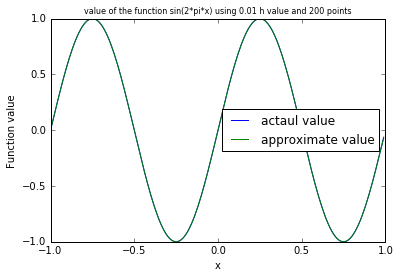

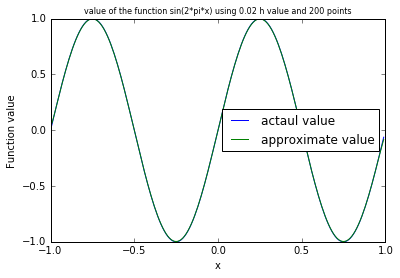

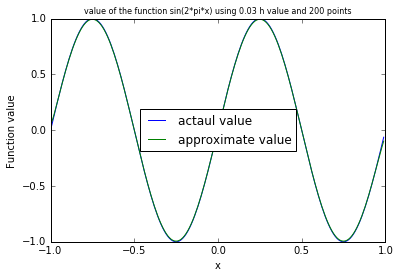

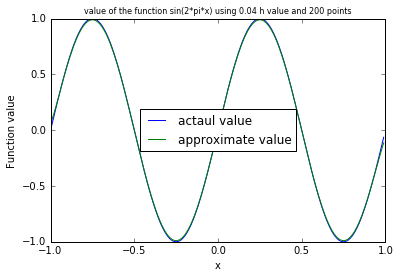

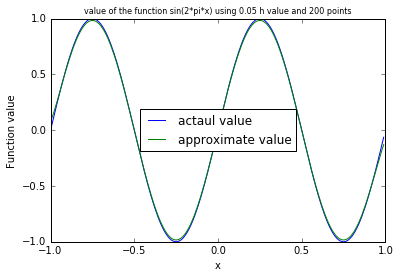

In [8]:
plot()

Approximate value and actual value of the function sin(2*pi*x) are plotted below using gaussian kernel. Which shows good matching between these values.

Enter G for gaussian kernel and C for cubicspline kernelG


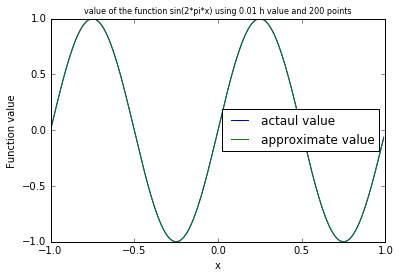

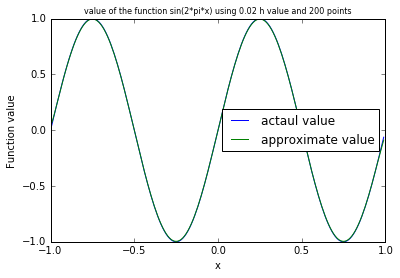

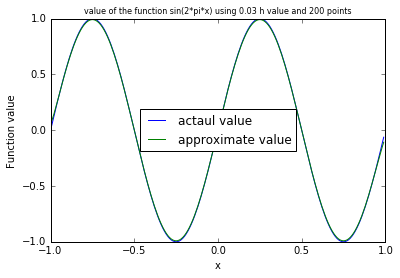

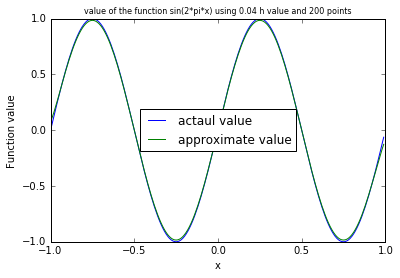

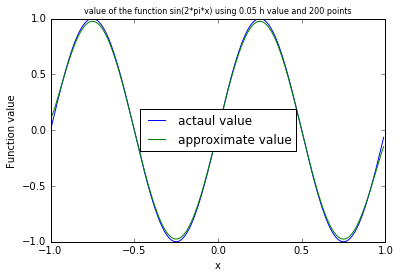

In [9]:
plot()

Approximate value and actual value of the derivative of the function sin(2*pi*x) are plotted below using cubicspline kernel. Which shows good matching between these values except at boundary points. And the error at boundary ponts increases as h value increases.

Enter G for gaussian kernel and C for cubicspline kernelC


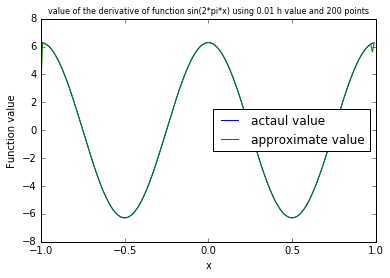

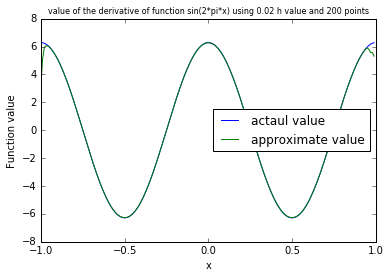

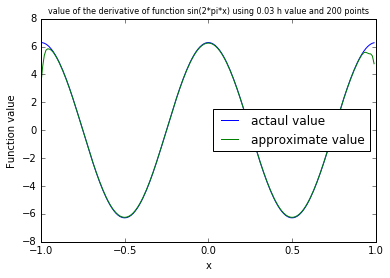

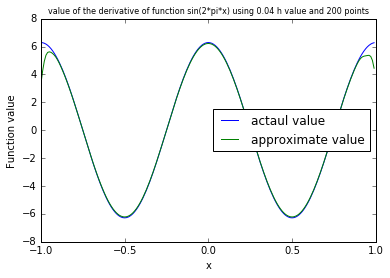

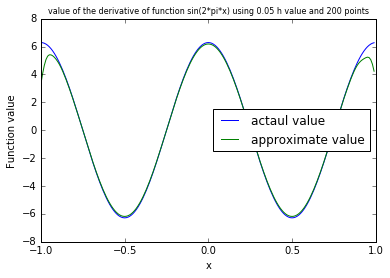

In [11]:
plot()

Approximate value and actual value of the derivative of the function sin(2*pi*x) are plotted below using gaussian kernel. Which shows good matching between these values except at boundary points. And the error at boundary ponts increases as h value increases.

Enter G for gaussian kernel and C for cubicspline kernelG


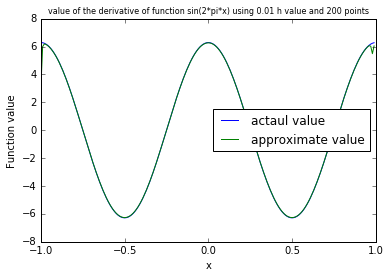

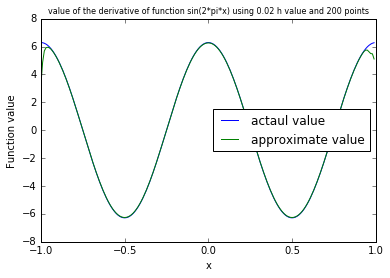

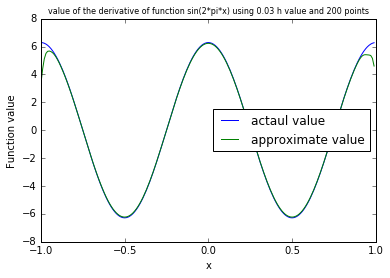

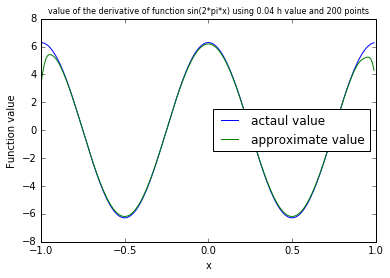

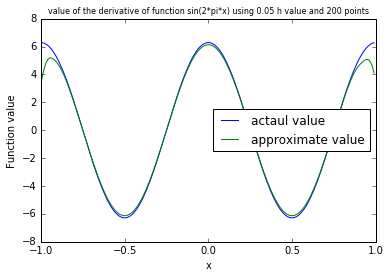

In [12]:
plot()

Plots for Error vs different h values are shown in below plots of the function sin(2*np.pi*x) using Cubic spline kernel.
In first plot the relative error w.r.t the maximum value of the function vs h values are plotted as function of different no.
of points used. It is clearly seen that as the no. of points increases the value of the error decreases. 
                            In second plot the relative error in the derivative of the function w.r.t the maximumx value of the
derivative of the function vs different h values are plotted as a function of the no. of points used. It is clearly seen that 
upto a certain value of h (around 1.8) the error oscillates. And after that as the no. of points used are increased the value of
the error in derivative decreases.

Enter G for gaussian kernel and C for cubicspline kernelC


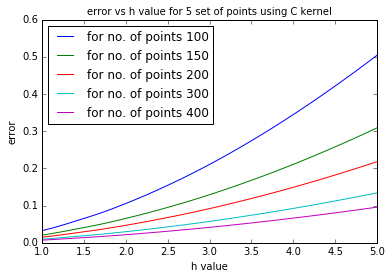

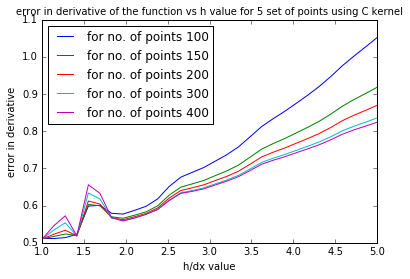

In [2]:
plot()

Plots for Error vs different h values are shown in below plots of the function sin(2*np.pi*x) using Gaussian kernel.
In first plot the relative error w.r.t the maximum value of the function vs h values are plotted as a function of different no.
of points used. It is clearly seen that as the no. of points increases the value of the error decreases. 
                            In second plot the relative error in the derivative of the function w.r.t the maximumx value of the
derivative of the function vs different h values are plotted as a function of the no. of points used. It is clearly seen that 
as the no. of points used are increased the value of the error in derivative decreases.

Enter G for gaussian kernel and C for cubicspline kernelG


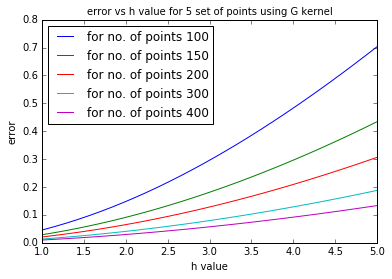

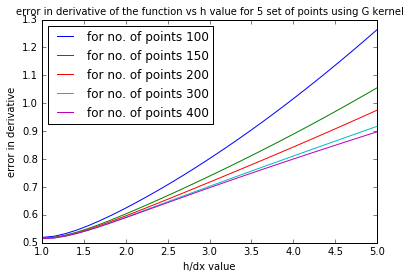

In [3]:
plot()

Error plots are plotted below excluding 10 no. of boundary points and using cubic spline kernel. We can see that the error
value has decreased comparative to the previous plots where boundary points were included.

Enter G for gaussian kernel and C for cubicspline kernelC


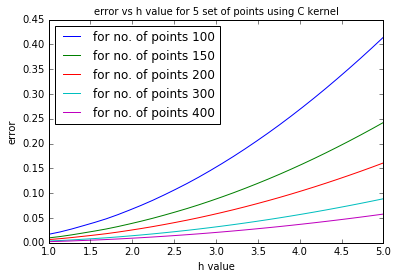

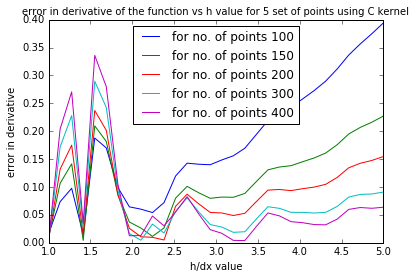

In [5]:
plot()

Error plots are plotted below excluding the 10 no. of boundary points and using gaussian kernel. We can see that the error
value has decreased comparative to the previous plots where boundary points were included.

Enter G for gaussian kernel and C for cubicspline kernelG


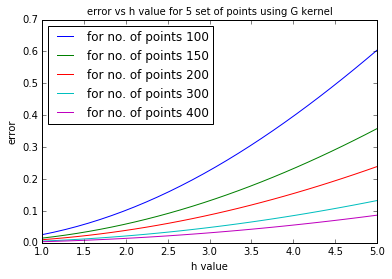

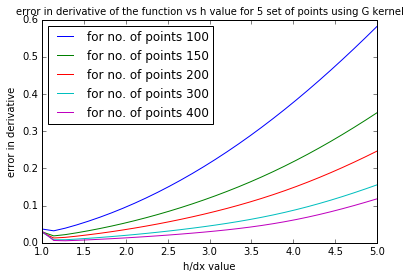

In [6]:
plot()